In [94]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn import datasets
from sklearn.datasets import load_iris

import warnings
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from line_profiler import LineProfiler

iris = datasets.load_iris()

train_X, res_x, train_y, res_y = train_test_split(
    iris.data,
    iris.target,
    stratify=iris.target,
    random_state=0
)
warnings.simplefilter('ignore')


In [95]:
# 学習させる（学習にかかる時間を計測する）

m_SVC = SVC()
m_LinearSVC = LinearSVC()
m_DecisionTreeClassifier = DecisionTreeClassifier()
m_GradientBoostingClassifier = GradientBoostingClassifier()
m_RandomForestClassifier = RandomForestClassifier()
m_KNeighborsClassifier = KNeighborsClassifier()
m_GaussianNB = GaussianNB()
m_SGDClassifier = SGDClassifier()
m_LogisticRegression = LogisticRegression()
m_MLPClassifier = MLPClassifier()


def main():
    for _ in range(100):
        m_SVC.fit(train_X, train_y)
        m_LinearSVC.fit(train_X, train_y)
        m_DecisionTreeClassifier.fit(train_X, train_y)
        m_GradientBoostingClassifier.fit(train_X, train_y)
        m_RandomForestClassifier.fit(train_X, train_y)
        m_KNeighborsClassifier.fit(train_X, train_y)
        m_GaussianNB.fit(train_X, train_y)
        m_SGDClassifier.fit(train_X, train_y)
        m_LogisticRegression.fit(train_X, train_y)
        m_MLPClassifier.fit(train_X, train_y)


pr = LineProfiler()
pr.add_function(main)
pr.runcall(main)
pr.print_stats()


Timer unit: 1e-07 s

Total time: 46.2545 s
File: C:\Users\Haya\AppData\Local\Temp/ipykernel_9124/779428784.py
Function: main at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
    15                                           def main():
    16       101       1907.0     18.9      0.0      for _ in range(100):
    17       100     654716.0   6547.2      0.1          m_SVC.fit(train_X, train_y)
    18       100    4071032.0  40710.3      0.9          m_LinearSVC.fit(train_X, train_y)
    19       100     474569.0   4745.7      0.1          m_DecisionTreeClassifier.fit(train_X, train_y)
    20       100  181832091.0 1818320.9     39.3          m_GradientBoostingClassifier.fit(train_X, train_y)
    21       100  156681396.0 1566814.0     33.9          m_RandomForestClassifier.fit(train_X, train_y)
    22       100     464090.0   4640.9      0.1          m_KNeighborsClassifier.fit(train_X, train_y)
    23       100     673512.0   6735.1      0.1          m_GaussianNB

In [96]:
# 予測させる（予測にかかる時間を計測する）

def main():
    for _ in range(100):
        m_SVC.predict(res_x)
        m_LinearSVC.predict(res_x)
        m_DecisionTreeClassifier.predict(res_x)
        m_GradientBoostingClassifier.predict(res_x)
        m_RandomForestClassifier.predict(res_x)
        m_KNeighborsClassifier.predict(res_x)
        m_GaussianNB.predict(res_x)
        m_SGDClassifier.predict(res_x)
        m_LogisticRegression.predict(res_x)
        m_MLPClassifier.predict(res_x)


pr = LineProfiler()
pr.add_function(main)
pr.runcall(main)
pr.print_stats()


Timer unit: 1e-07 s

Total time: 1.43265 s
File: C:\Users\Haya\AppData\Local\Temp/ipykernel_9124/2088489530.py
Function: main at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def main():
     4       101        833.0      8.2      0.0      for _ in range(100):
     5       100     270692.0   2706.9      1.9          m_SVC.predict(res_x)
     6       100      89414.0    894.1      0.6          m_LinearSVC.predict(res_x)
     7       100     103159.0   1031.6      0.7          m_DecisionTreeClassifier.predict(res_x)
     8       100     577267.0   5772.7      4.0          m_GradientBoostingClassifier.predict(res_x)
     9       100   10723559.0 107235.6     74.9          m_RandomForestClassifier.predict(res_x)
    10       100    1986463.0  19864.6     13.9          m_KNeighborsClassifier.predict(res_x)
    11       100     198965.0   1989.7      1.4          m_GaussianNB.predict(res_x)
    12       100     112129.

In [97]:
# モデル評価
def make_row(name, model):
    pred_y = model.predict(res_x)
    return [name,
            f1_score(res_y, pred_y, average="micro"),
            accuracy_score(res_y, pred_y),
            precision_score(res_y, pred_y, average="micro"),
            recall_score(res_y, pred_y, average="micro"),
            ]


ar = [
    make_row("SVC", m_SVC),
    make_row("LinearSVC", m_LinearSVC),
    make_row("DecisionTreeClassifier", m_DecisionTreeClassifier),
    make_row("GradientBoostingClassifier", m_GradientBoostingClassifier),
    make_row("RandomForestClassifier", m_RandomForestClassifier),
    make_row("KNeighborsClassifier", m_KNeighborsClassifier),
    make_row("GaussianNB", m_GaussianNB),
    make_row("SGDClassifier", m_SGDClassifier),
    make_row("LogisticRegression", m_LogisticRegression),
    make_row("MLPClassifier", m_MLPClassifier),
]
df = pd.DataFrame(ar, columns=["Model", "F1-score", "Accuracy", "Precision", "Recall"])
df["Learn-time"] = [6607.9, 40967.2, 4990.2, 1831689.6, 1573357.6, 4742.3, 6687.3, 17993.5, 212187.2, 949669.1]
df["Predict-time"] = [2672.6, 889.3, 1029.4, 5805.1, 106890.0, 20264.1, 2046.3, 1152.9, 859.7, 1744.9]
df


,Model,F1-score,Accuracy,Precision,Recall,Learn-time,Predict-time
0,SVC,1.000000,1.000000,1.000000,1.000000,6607.9,2672.6
1,LinearSVC,0.947368,0.947368,0.947368,0.947368,40967.2,889.3
2,DecisionTreeClassifier,0.947368,0.947368,0.947368,0.947368,4990.2,1029.4
3,GradientBoostingClassifier,0.973684,0.973684,0.973684,0.973684,1831689.6,5805.1
4,RandomForestClassifier,0.973684,0.973684,0.973684,0.973684,1573357.6,106890.0
5,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,4742.3,20264.1
6,GaussianNB,0.973684,0.973684,0.973684,0.973684,6687.3,2046.3
7,SGDClassifier,0.763158,0.763158,0.763158,0.763158,17993.5,1152.9
8,LogisticRegression,1.000000,1.000000,1.000000,1.000000,212187.2,859.7
9,MLPClassifier,1.000000,1.000000,1.000000,1.000000,949669.1,1744.9


<AxesSubplot:ylabel='Model'>

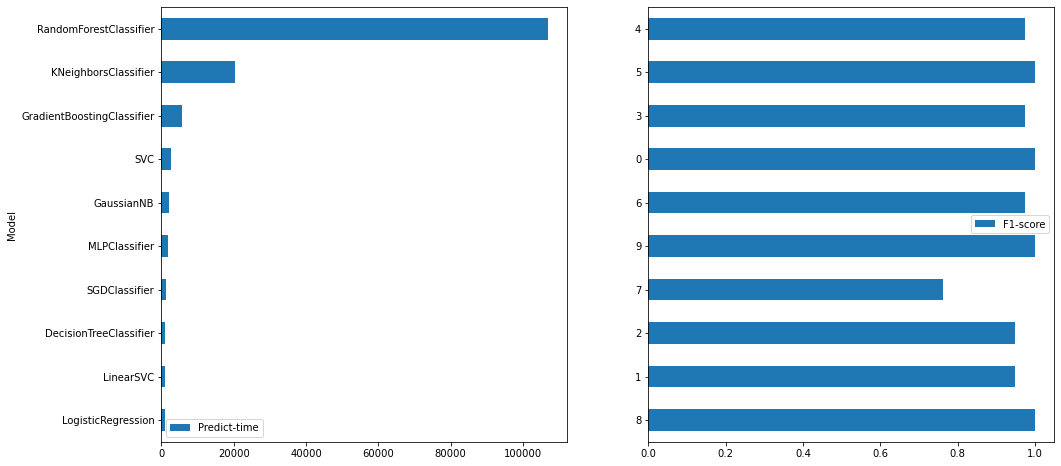

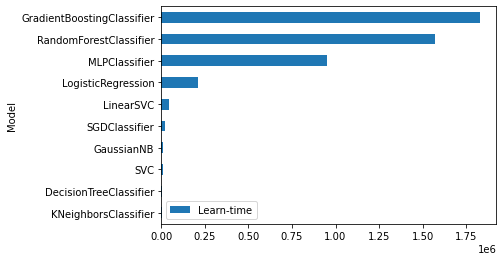

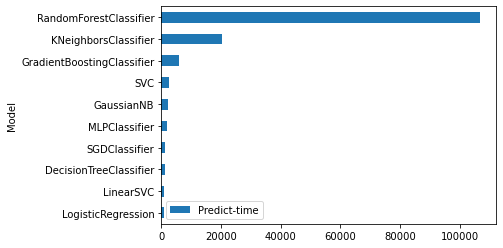

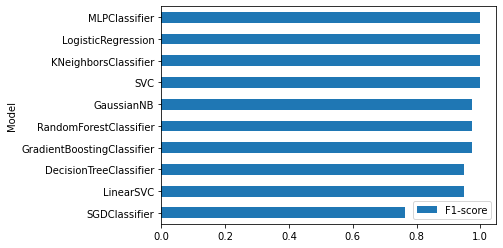

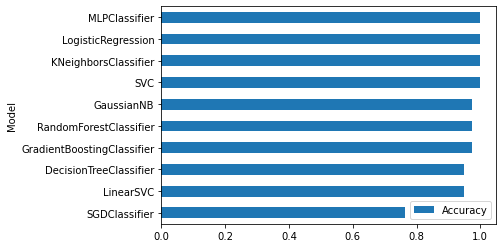

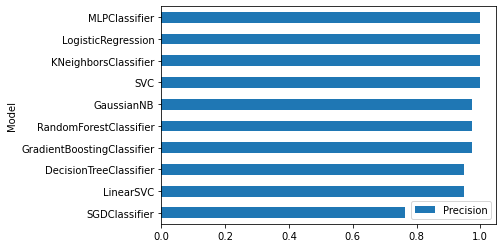

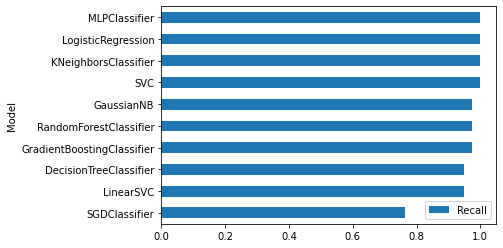

In [98]:
# グラフ化
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
df.sort_values("Predict-time").plot(kind='barh', x=df.columns[0], y=df.columns[6],ax=axes[0])
df.sort_values("Predict-time").plot(kind='barh', y=df.columns[1],ax=axes[1])

df.sort_values("Learn-time").plot(kind='barh', x=df.columns[0], y=df.columns[5])
df.sort_values("Predict-time").plot(kind='barh', x=df.columns[0], y=df.columns[6])
df.sort_values("F1-score").plot(kind='barh', x=df.columns[0], y=df.columns[1])
df.sort_values("Accuracy").plot(kind='barh', x=df.columns[0], y=df.columns[2])
df.sort_values("Precision").plot(kind='barh', x=df.columns[0], y=df.columns[3])
df.sort_values("Recall").plot(kind='barh', x=df.columns[0], y=df.columns[4])
